# Figure. Heritability Distribution

In [1]:
import cPickle
import glob
import os
import random
import subprocess

import cdpybio as cpb
from ipyparallel import Client
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pybedtools as pbt
from scipy.stats import fisher_exact
import seaborn as sns
import tabix
import vcf as pyvcf
import weblogolib as logo

import cardipspy as cpy
import ciepy

%matplotlib inline
%load_ext rpy2.ipython

dy_name = 'figure_heritability_distribution'

import socket
if socket.gethostname() == 'fl-hn1' or socket.gethostname() == 'fl-hn2':
    dy = os.path.join(ciepy.root, 'sandbox', dy_name)
    cpy.makedir(dy)
    pbt.set_tempdir(dy)
    
outdir = os.path.join(ciepy.root, 'output', dy_name)
cpy.makedir(outdir)

private_outdir = os.path.join(ciepy.root, 'private_output', dy_name)
cpy.makedir(private_outdir)

In [2]:
gene_info = pd.read_table(cpy.gencode_gene_info, index_col=0)

dy = os.path.join(ciepy.root, 'output/eqtl_processing/eqtls01')
fn = os.path.join(dy, 'qvalues.tsv')
qvalues = pd.read_table(fn, index_col=0)

fn = '/projects/CARDIPS/analysis/cardips-ipsc-eqtl/output/eqtl_processing/no_peer_no_std_norm01/h2.tsv'
h2 = pd.read_table(fn, index_col=0, header=None, squeeze=True)

fn = os.path.join(ciepy.root, 'output', 'input_data', 'rsem_tpm.tsv')
exp = pd.read_table(fn, index_col=0)

In [3]:
sns.set_style('whitegrid')

In [4]:
n = h2.median()
print('Median h2 for all genes: {}'.format(n))
n = h2.ix[qvalues[qvalues.perm_sig].index].median()
print('Median h2 for eGenes: {}'.format(n))

Median h2 for all genes: 0.38732
Median h2 for eGenes: 0.443164


/frazer01/home/cdeboever/software/anaconda/envs/cie/lib/python2.7/site-packages/matplotlib/gridspec.py:302: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


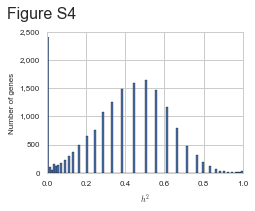

In [5]:
fig = plt.figure(figsize=(4.48, 3), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 1, 'Figure S4',
        size=16, va='top')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.8, 0.5, 1])


gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
ax = fig.add_subplot(gs[0, 0])
h2.hist(bins=100, ax=ax)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.set_xlabel('$h^2$', fontsize=8)
ax.set_ylabel('Number of genes', fontsize=8)
ax.yaxis.set_major_formatter(ciepy.comma_format)
gs.tight_layout(fig, rect=[0, 0, 1, 0.9])

fig.savefig(os.path.join(outdir, 'h2_distribution.pdf'))
fig.savefig(os.path.join(outdir, 'h2_distribution.png'), dpi=300)

EMMAX provides an estimate of the heritability for each gene that represents the fraction of variance in expression explained by the overall genetic relatedness of the different subjects. We reran EMMAX for each gene using log TPM expression estimates with only batch, sex, and age as covariates and found that the median h2 was 39% and 44% for all genes and eGenes respectively (Figure S4).

Figure S4. EMMAX heritability estimates. Distribution of gene expression heritability estimates from EMMAX using log RSEM transcripts per million (TPM) values with only batch, sex, and age as covariates. The EMMAX heritability estimates are [finish]

The lead variants for these four genes explained 18%, 11%, 6%, and 19% of the variance in gene expression in a model using log TPM values with only batch, sex, and age as covariates although the heritability estimates for these four genes under this model were 80%, 72%, 67%, and 80% respectively, indicating that these genes’ expression are strongly affected by both cis and trans variants.